# **Business Analysis: Olist's e-commerce landscape with data insights**
***

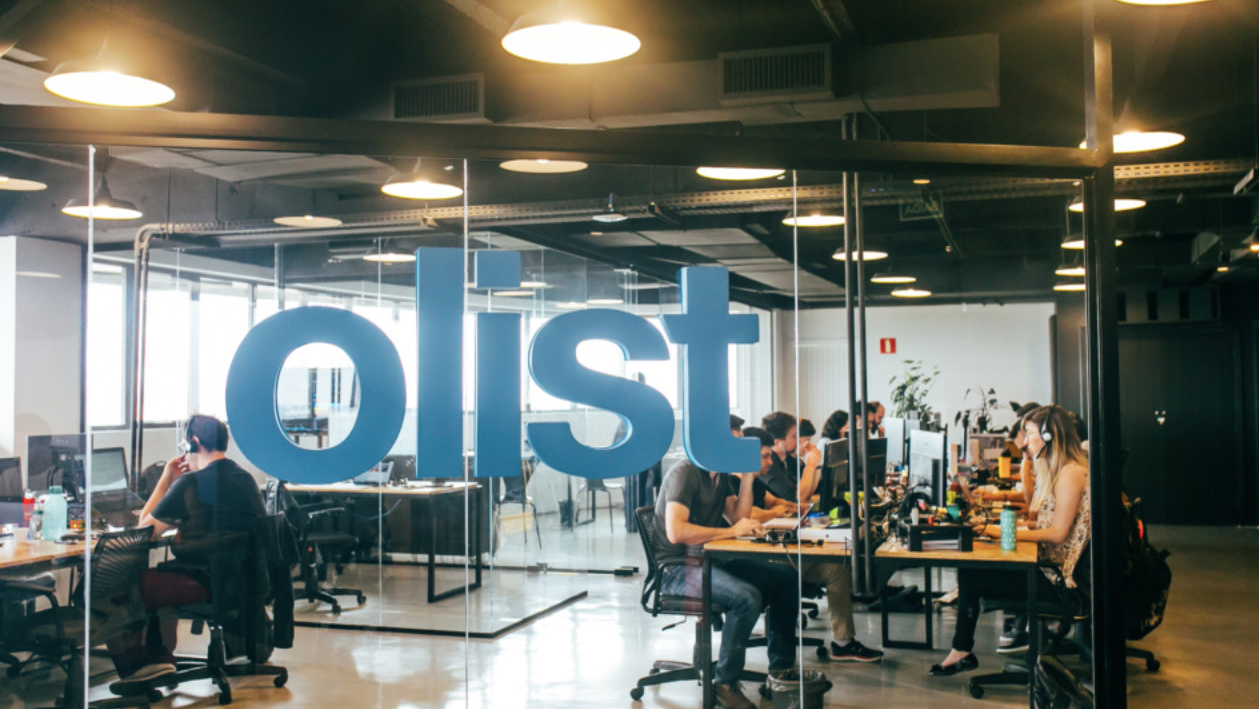

## **Problem statment**

Founded in 2015, Olist is a Brazilian e-commerce platform that serves as a marketplace facilitator for small and medium-sized businesses across the country. Operating similarly to global giants, Olist streamlines the workflow for merchants, offering a hassle-free channel to sell products through the Olist Store, complete with efficient logistics partners

Olist, a key player in Brazilian e-commerce, is conducting a strategic analysis of its dataset from 2016 to 2018. The goal is to gain critical insights into customer growth, sales dynamics, and operational efficiency. Olist aims to refine its strategies, improve market positioning, and thrive in the dynamic Brazilian e-commerce market by leveraging the power of data.  
The project aims to convert raw data into actionable insights that will drive impactful business decisions.

## **Data collection**

**Source**: Kaggle.com  
**Link**: https://www.kaggle.com/datasets/erak1006/brazilian-e-commerce-company-olist?select=order_reviews_dataset.csv

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from olist_functions import *
from scipy.stats.mstats import winsorize

In [2]:
# read csv
df_customers = pd.read_csv("customers_dataset.csv")
df_orders = pd.read_csv("orders_dataset.csv")
df_order_items = pd.read_csv("order_items_dataset.csv")
df_order_payments = pd.read_csv("order_payments_dataset.csv")
df_order_reviews = pd.read_csv("order_reviews_dataset.csv")
df_product_category = pd.read_csv("product_category_name_translation.csv")
df_products = pd.read_csv("products_dataset.csv")
df_seller = pd.read_csv("sellers_dataset.csv")

## **EDA- Exploratory Data Analysis**

Before working with the data, it's essential to understand the dataset's content and nature. Exploratory Data Analysis (EDA) serves this purpose by revealing key patterns and insights within the data. This includes understanding the data structure, identifying patterns, and uncovering potential data issues. The EDA stage will involve the following steps:
1. Merging the data frames.
2. Displaying general data.
3. Univariate EDA
4. Multivariate EDA.

### **Mergining data frames**

The first step will be merging the above datasets into a **unified** data frame.   
This step is necessary because each data frame contains **partial** information about the orders, making it challenging to establish the overall picture.
By merging the datasets, I will create a comprehensive dataset for analysis, which will streamline the work.

In [3]:
# merge data frames
df_merged = pd.merge(df_orders, df_order_items, on="order_id")
df_merged = df_merged.merge(df_order_payments, on="order_id")
df_merged = df_merged.merge(df_order_reviews, how= "left", on="order_id")
df_merged = df_merged.merge(df_products, on="product_id")
df_merged = df_merged.merge(df_product_category, how="left", on="product_category_name")
df_merged = df_merged.merge(df_customers, on="customer_id")
df_merged = df_merged.merge(df_seller, on="seller_id")

### **Displaying general data**

In [4]:
# set display options
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None)

# print top records in df (a look of how the data looks like)
df_merged.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,1,credit_card,3,37.77,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,1,credit_card,1,37.77,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350,maua,SP


In [5]:
# print df info (cols, types and how many non-null values there are)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118315 entries, 0 to 118314
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118315 non-null  object 
 1   customer_id                    118315 non-null  object 
 2   order_status                   118315 non-null  object 
 3   order_purchase_timestamp       118315 non-null  object 
 4   order_approved_at              118300 non-null  object 
 5   order_delivered_carrier_date   117061 non-null  object 
 6   order_delivered_customer_date  115727 non-null  object 
 7   order_estimated_delivery_date  118315 non-null  object 
 8   order_item_id                  118315 non-null  int64  
 9   product_id                     118315 non-null  object 
 10  seller_id                      118315 non-null  object 
 11  shipping_limit_date            118315 non-null  object 
 12  price                         

In [6]:
# print statistical data
df_merged.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
count,118315,118315,118315,118315,118300,117061,115727,118315,118315.000000,118315,118315,118315,118315.000000,118315.000000,118315.000000,118315,118315.000000,118315.000000,118315,118315.000000,14089,50665,118315,118315,116606,116606.000000,116606.000000,116606.000000,118295.000000,118295.000000,118295.000000,118295.000000,116581,118315,118315.000000,118315,118315,118315.000000,118315,118315
unique,98665,98665,7,98111,90173,81016,95663,449,NaN,32951,3095,93317,NaN,NaN,NaN,4,NaN,NaN,98452,NaN,4569,36434,633,98290,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71,95419,NaN,4110,27,NaN,611,23
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31,NaN,NaN,NaN,credit_card,NaN,NaN,eef5dbca8d37dfce6db7d7b16dd0525e,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-08-17 22:17:55,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,NaN,sao paulo,SP
freq,63,63,115728,63,63,63,63,656,NaN,536,2155,63,NaN,NaN,NaN,87266,NaN,NaN,63,NaN,498,259,546,63,11990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11990,75,NaN,18728,49865,NaN,29294,84384
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.196509,NaN,NaN,NaN,120.651027,20.033024,1.094062,NaN,2.943498,172.575651,NaN,4.014554,NaN,NaN,NaN,NaN,NaN,48.767782,785.944008,2.205144,2112.331011,30.265227,16.620009,23.075075,NaN,NaN,35051.681579,NaN,NaN,24440.790703,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.699452,NaN,NaN,NaN,184.109626,15.836523,0.728555,NaN,2.778022,267.104661,NaN,1.400186,NaN,NaN,NaN,NaN,NaN,10.033375,652.578636,1.717429,3786.717861,16.189038,13.453941,11.749311,NaN,NaN,29824.811223,NaN,NaN,27571.679456,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,1.000000,NaN,0.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN,NaN,1003.000000,NaN,NaN,1001.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,1.000000,NaN,1.000000,60.850000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN,NaN,11310.000000,NaN,NaN,6429.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,74.900000,16.280000,1.000000,NaN,2.000000,108.200000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN,NaN,24310.000000,NaN,NaN,13660.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,134.900000,21.180000,1.000000,NaN,4.000000,189.260000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,NaN,NaN,58640.000000,NaN,NaN,27946.500000,NaN,NaN


**Obeservations-**

1. Data frame "df_merged" info-
   * Number of cols: 40.
   * Number of records: 118,315.
   * Number of categorical features: 24 cols out of total 40 ("object").
   * Number of categorical features: 16 cols out of total 40 ("float"(14), "int"(2)).

2. Potential inaccuracies and issues including-
   * Presence of missing values in certain columns suggesting incomplete information for some orders.
     For example: in column "order_id" the number of non-null records is 119151 while in "product_id" it equals 118318. This observation indicates that not every order is associated with a purchased product, which is unusual.
   * Incorrect data types, particularly for time-related columns.
     For example: column "order_purchase_timestamp" is labeled as an "object" instead of the expected "datetime".
   * Non-uniqueness in columns meant to be unique identifiers.
     For example: discrepancy in the count of unique values between "customer_unique_id" and "customer_id".
   * Anomalies in numerical columns, with maximum values significantly surpassing average and median values, hinting at potential outliers.
     For example: a purchase worth 6735(USD) in the "price" column compared to an average of 183(USD) and a median of 134(USD).

### **Univariate EDA**

In [7]:
import warnings

# Ignore specific warning
warnings.filterwarnings("ignore", message="FixedFormatter should only be used together with FixedLocator")

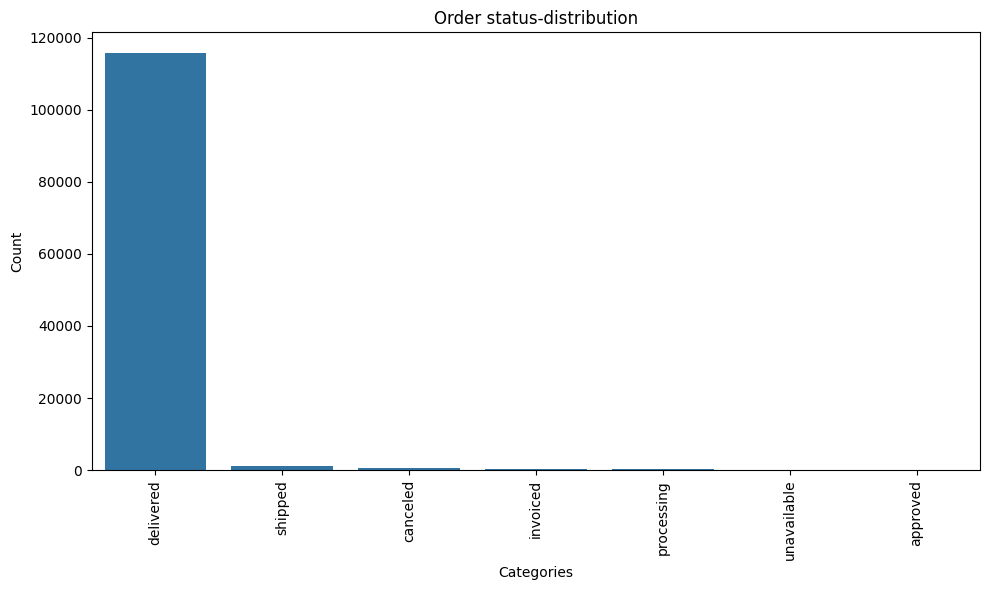

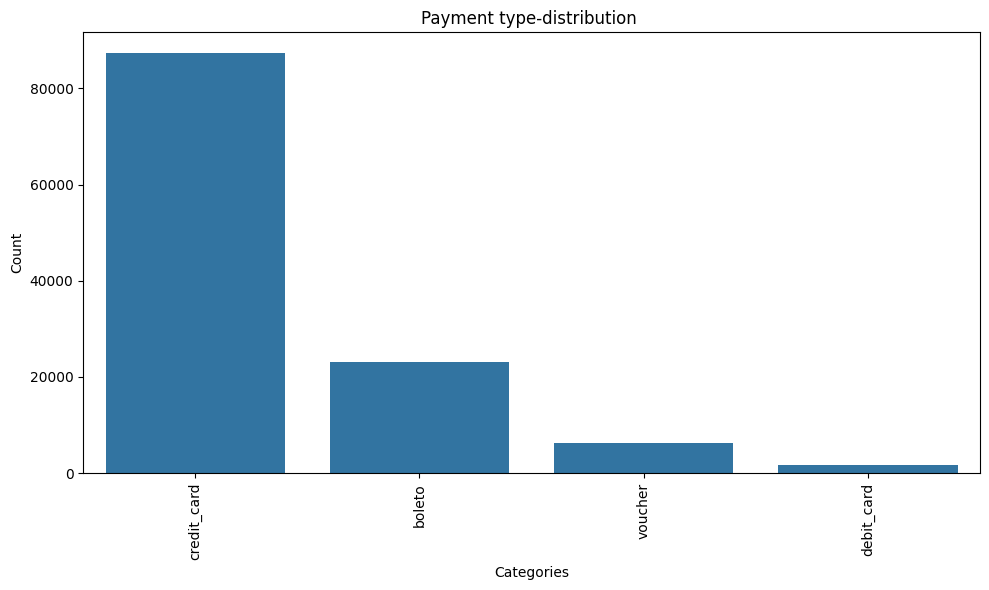

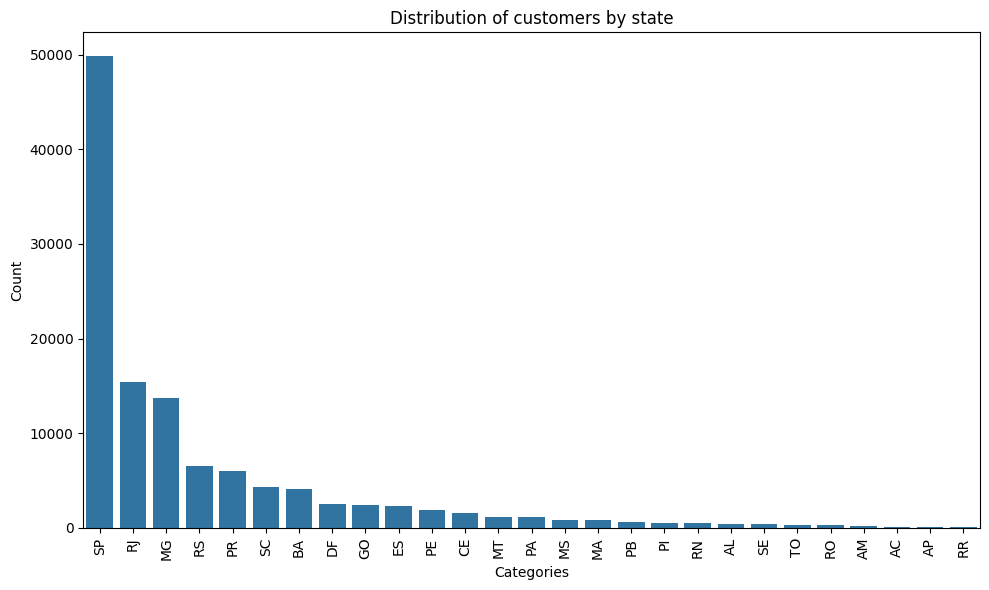

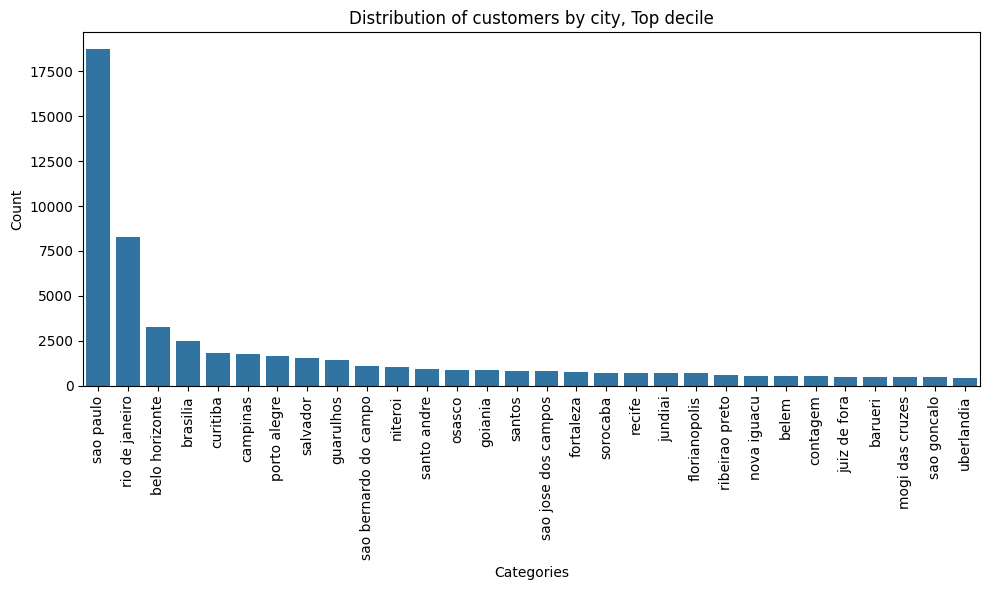

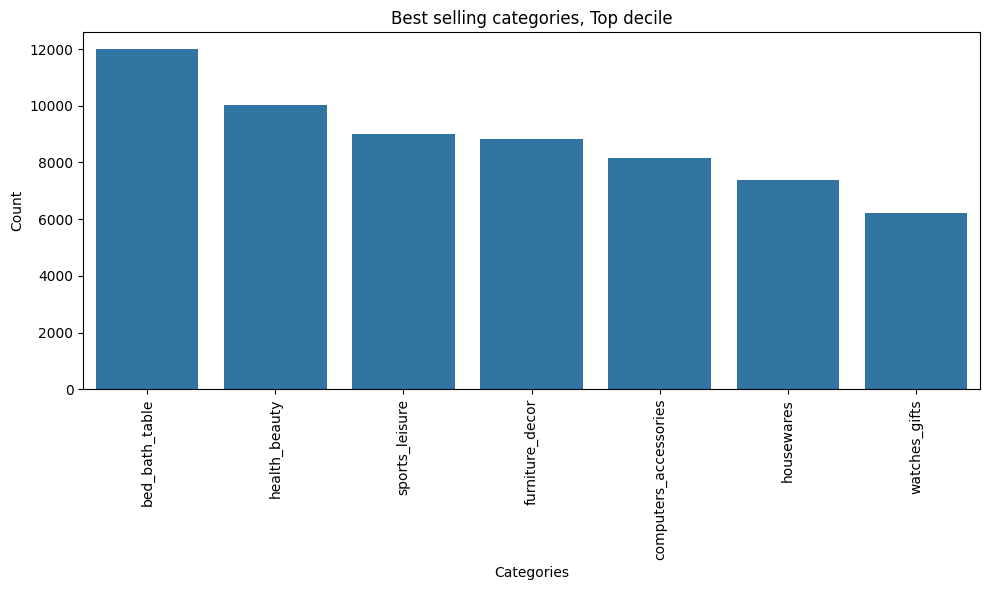

In [8]:
# create sub_df for selected categorical features
sub_df_CAT = df_merged[["order_status",
                        "payment_type",
                        "customer_state",
                        "customer_city",
                        "product_category_name_english"]]

# create titles for each barplot
titles = ["Order status-distribution",
          "Payment type-distribution ",
          "Distribution of customers by state",
          "Distribution of customers by city, Top decile",
          "Best selling categories, Top decile"]

# apply "create_barplot"
for col, title in zip(sub_df_CAT.columns, titles):
  if col != "product_category_name_english":
    create_barplot_simple(sub_df_CAT, col, title, "Categories", "Count", True, 30)
  else:
    create_barplot_simple(sub_df_CAT, col, title, "Categories", "Count", True, 7)

**Obeservations-**
* Geographical presence- the company has a significant presence across 27 regions (26 states and 1 federal district). Notably, the majority of the company's customers are from the state of So Paulo (SP), with the state of Rio de Janeiro (RJ) coming in second, albeit with a significant decrease of nearly 55%.
* Product categories- the company boasts a diverse product portfolio, spanning 73 distinct categories. Among the top sellers we can see the following categories:"bed bath table", "health beauty", "sports leisure".
* Order statuses- orders are classified into 8 statuses: "created", "approved", "invoiced", "processing", "shipped", "delivered", "canceled", and "unavailable". A notable trend indicates that a large percentage of orders have been successfully delivered, while a smaller percentage is currently in the shipping process ("shipped", "processing"). Furthermore, a small number of orders have been canceled.
* Payment methods- The company offers customers a variety of payment options. Notably, credit cards are the most popular payment method among customers.

**Univariate EDA- Continues features**

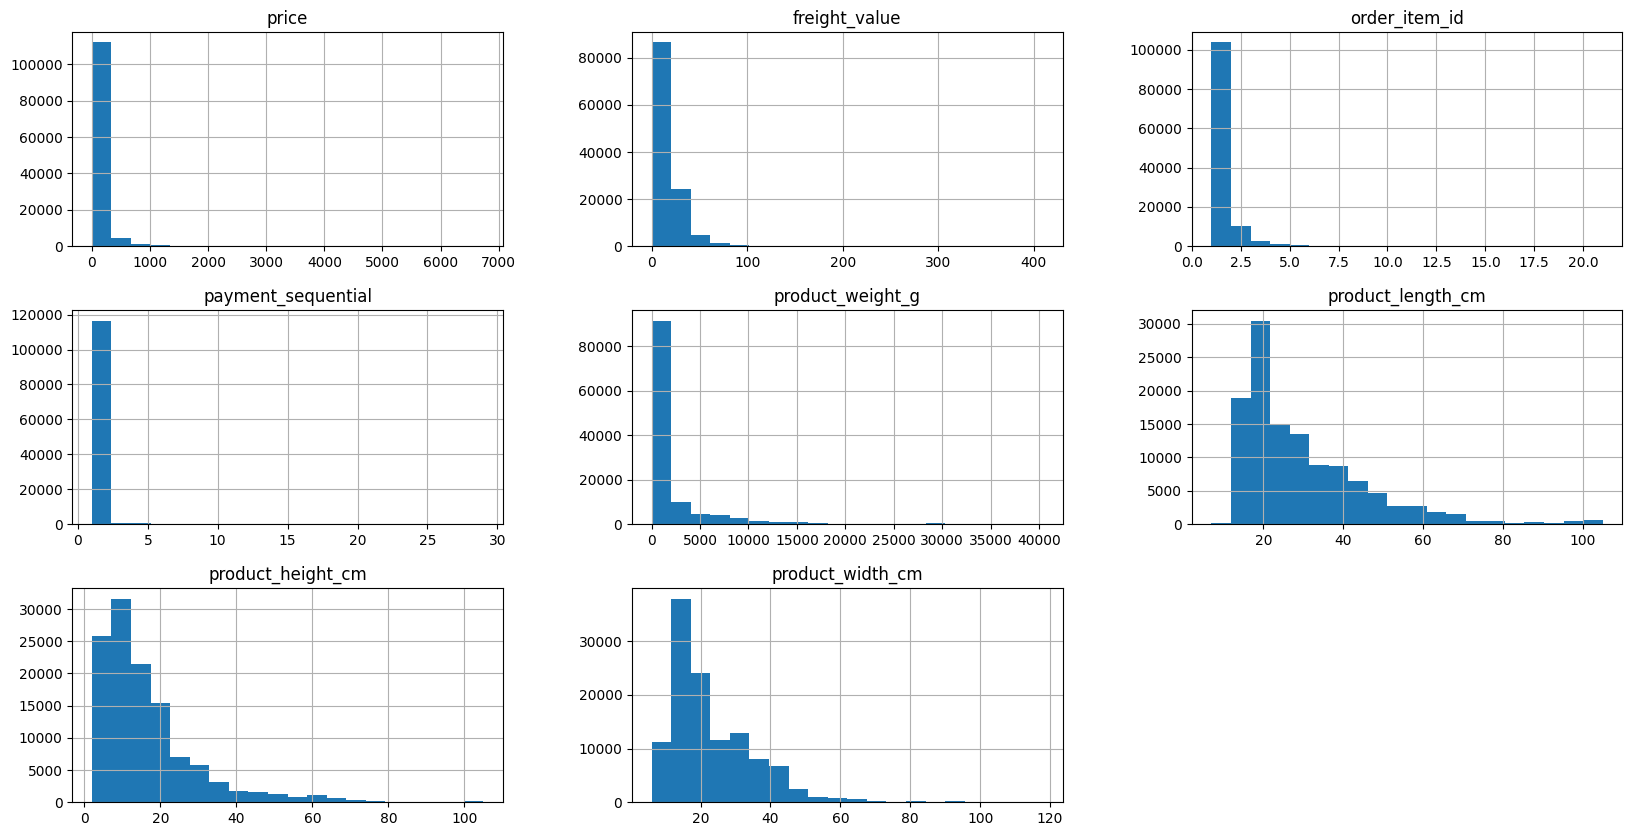

In [9]:
# create a sub_df for selected continues cols
sub_df_CON = df_merged[["price",
                        "freight_value",
                        "order_item_id",
                        "payment_sequential",
                        "product_weight_g",
                        "product_length_cm",
                        "product_height_cm",
                        "product_width_cm"]]

# create histogram for each col in sub_df_NUM
sub_df_CON.hist(bins=20, figsize=(20,10))
plt.show()

**Obeservations-**
* Product prices- product prices range from 0.85(USD) to 6735(USD), indicating a diverse offering of both low-cost and high-end products.
* Product dimensions- product dimensions such as width, weight, height, and length vary across different ranges. This variation could later be used to classify products based on their size, ranging from small to large.
* Product weight- notably, there are products with a weight recorded as "0" gr', a peculiar observation that warrants further investigation.
* Outliers- The numerical features reveal the presence of abnormal values, prompting a closer examination to determine their validity and relevance.

### **Multivariate EDA**

**Ranks by Product categories**

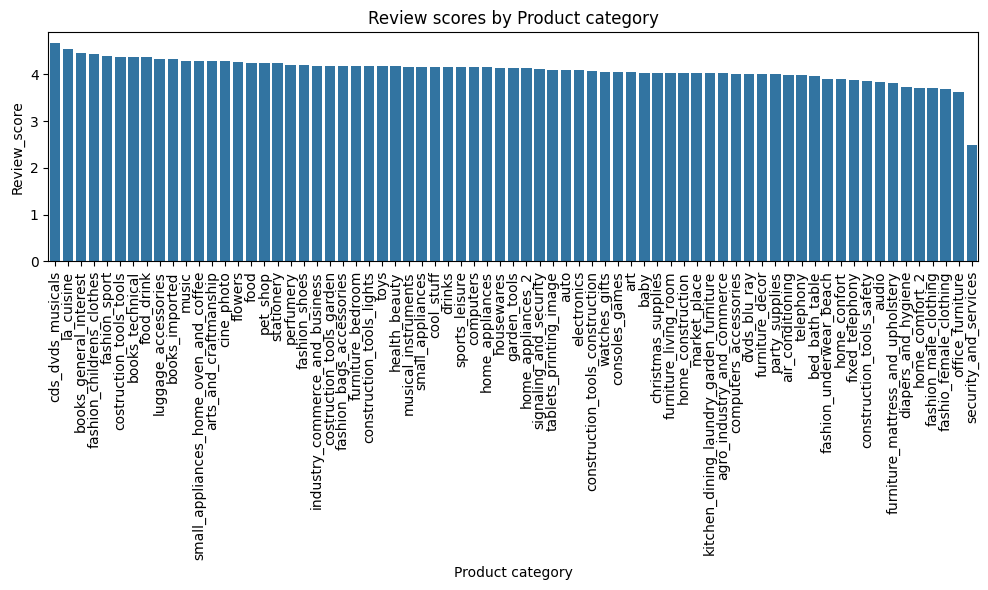

In [10]:
# create sub_df for categories vs rank
category_vs_rank = df_merged.drop_duplicates("order_id")
category_vs_rank = category_vs_rank[["product_category_name_english", "review_score"]]
category_vs_rank = category_vs_rank.groupby("product_category_name_english")["review_score"].mean().reset_index()
category_vs_rank= category_vs_rank.sort_values(by="review_score", ascending=False)

# apply "create_barplot_complicated"
create_barplot_complicated(category_vs_rank,
                           "product_category_name_english",
                           "review_score",
                           "Review scores by Product category",
                           "Product category",
                           "Review_score",
                           True)

**Obeservations-**   
* "Cds_dvds_musicals" is the most highly rated category, with an average rating of 4.6/5, while "security_and_services" has the lowest average rating of 2.5/5.
* Despite its popularity, "bed_bath_table" is ranked 58th of the 71 categories.

**The correlation between the price and the product's dimensions**

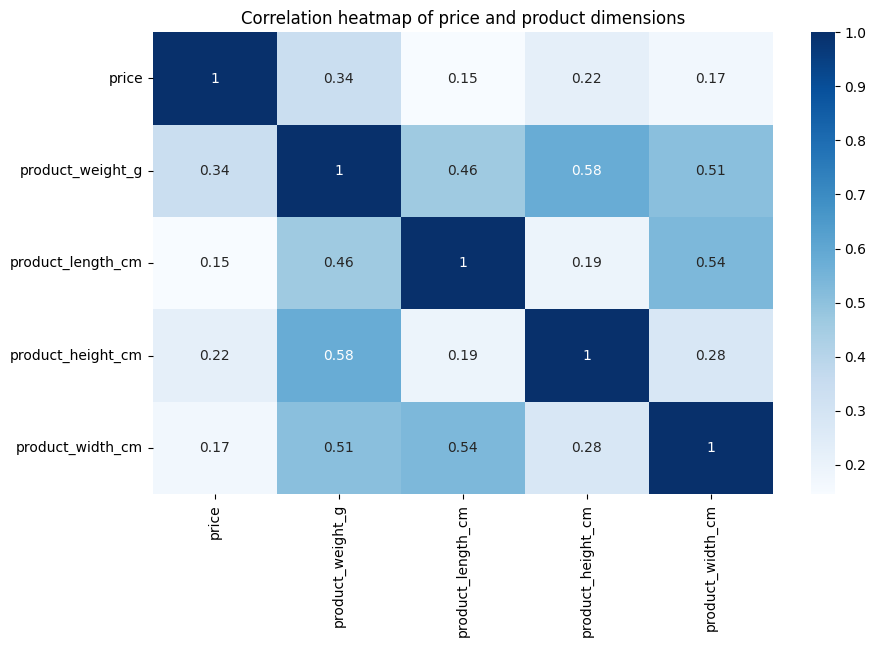

In [11]:
# create sub_df with selected cols
sub_df_NUM = df_merged[["price", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]]

# create heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(sub_df_NUM.corr(), annot=True, cmap="Blues")
heatmap.set_title("Correlation heatmap of price and product dimensions")
plt.show()

**Obeservations-**   
* The relationship between the product price and its dimensions appears to be unclear.
* There is a relationship between different dimensions, particularly the product weight and the other dimensions.

## **Data Preprocessing**

Data preprocessing is a process of cleaning and transforming raw data to make it suitable for analysis (or ML). Its main goal is to enhance data quality and prepare it for effective analysis (or model training) using methods such as "data cleaning", "data transformations" and more.  
The Data preprocessing stage will involve the following steps:
1. Deduplication
2. Removing unnecessary columns.
3. Casting columns.
4. Handling missing values.
5. Handling outliers.

#### **Deduplication**

Deduplication, also known as "duplicate removal", is a process that identifies and removes duplicate records from a dataset.  
Removing redundant and repetitive data aims to improve data accuracy and integrity while avoiding skewed analyses.

In [12]:
# save original df length
original_len = len(df_merged)

# drop duplicated records
df_merged.drop_duplicates(inplace=True)

# print result
print ("The number of records Before dropping duplicates:",original_len)
print ("The number of records AFTER dropping duplicates:",len(df_merged))
if original_len > len(df_merged):
  print ("Meaning, there were duplicated records and we successfully removed them!")
else:
  print("There were no duplicated records in the dataframe.")

The number of records Before dropping duplicates: 118315
The number of records AFTER dropping duplicates: 118315
There were no duplicated records in the dataframe.


#### **Removing unnecessary columns**

Next step is removing irrelevant columns, those that do not contribute significantly to the overall data analysis.  
This removal contributes to the data frame's simplification, lowering complexity.

**Note**- Out of all the columns that will be removed, "customer_unique_id" is the most interesting.  
i will remove the "customer_unique_id" column because it has **fewer unique values** than the "customer_id" column, indicating instances of shared "customer_unique_id" among **different** customers. As "customer_unique_id" doesn't provide distinctive information for analysis, and "customer_id"  is a stronger key, i choose to retain the "customer_id" column and drop "customer_unique_id."

In [13]:
# save original number of columns in df
num_cols1 = len(df_merged.columns)

# create a list of cols to remove(they are unnecessary)
list_remove_col =["shipping_limit_date",
                  "payment_sequential",
                  "payment_installments",
                  "payment_value",
                  "review_id",
                  "review_creation_date",
                  "review_answer_timestamp",
                  "product_name_lenght",
                  "product_description_lenght",
                  "product_photos_qty",
                  "customer_unique_id",
                  "customer_zip_code_prefix",
                  "seller_zip_code_prefix"]

# remove cols from df
df_merged.drop(columns= list_remove_col, inplace=True)

# print result
print("Before dropping irrelevent columns, the number of columns was:", num_cols1)
print("After dropping irrelevent columns, the number of columns is:", len(df_merged.columns))

Before dropping irrelevent columns, the number of columns was: 40
After dropping irrelevent columns, the number of columns is: 27


#### **Casting columns**

Some columns have inaccurate data types, like "object" instead of the expected date type. To ensure smooth data analysis, we will adjust the data types to match the actual values in these columns.

In [14]:
# select cols to change
my_cols_time = ["order_purchase_timestamp",
                "order_approved_at",
                "order_delivered_carrier_date",
                "order_delivered_customer_date",
                "order_estimated_delivery_date"]

# print "before"
print ("Before casting:")
print (df_merged[my_cols_time].info(), "\n")

# change cols type
df_merged[my_cols_time] = df_merged[my_cols_time].apply(lambda x: pd.to_datetime(x, format="%Y-%m-%d %H:%M:%S", errors='coerce'))

# print result
print ("After casting:")
print (df_merged[my_cols_time].info())

Before casting:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118315 entries, 0 to 118314
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   order_purchase_timestamp       118315 non-null  object
 1   order_approved_at              118300 non-null  object
 2   order_delivered_carrier_date   117061 non-null  object
 3   order_delivered_customer_date  115727 non-null  object
 4   order_estimated_delivery_date  118315 non-null  object
dtypes: object(5)
memory usage: 4.5+ MB
None 

After casting:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118315 entries, 0 to 118314
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_purchase_timestamp       118315 non-null  datetime64[ns]
 1   order_approved_at              118300 non-null  datetime64[ns]
 2   order

#### **Handling missing values**

As observed in "EDA- Displaying general data" (**3.2**), there are missing values present in the DataFrame.
There are several approaches to dealing with missing values, taking into consideration the type and amount of missing values.  

First step will be to identify the specific columns that have missing values.

In [15]:
# apply "find_NA"
find_NA(df_merged)

,missing count,missing percentage
order_approved_at,15,0.01
order_delivered_carrier_date,1254,1.06
order_delivered_customer_date,2588,2.19
review_comment_title,104226,88.09
review_comment_message,67650,57.18
product_category_name,1709,1.44
product_weight_g,20,0.02
product_length_cm,20,0.02
product_height_cm,20,0.02
product_width_cm,20,0.02


##### **Handling missing values- Missing systematically**

Some of the columns have the same number of missing values, indacting a potential pattern or consistency in the missingness across those columns.

In [16]:
# create lists for groups of cols with the same numbers of missing values
group1 = ["product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]

# apply "check_missing_sys"
check_missing_sys(df_merged, "group1", group1, "product_weight_g")

Missing values for: group1


product_weight_g     20
product_length_cm    20
product_height_cm    20
product_width_cm     20
dtype: int64

**Handle Group 1-**    
The result indicates that missing values are confined to a particular subset of observations, meaning they are missing systematically.   
In light of this, as well as the fact that the number of records with missing values is small compared to the overall data size (0.02%), I will remove these records.

In [17]:
# drop the records with missing values
df_merged.dropna(subset=group1, inplace=True)

# print result
print("The remainning missing values after handling 'Group1':", "\n")
find_NA(df_merged)

The remainning missing values after handling 'Group1': 



,missing count,missing percentage
order_approved_at,15,0.01
order_delivered_carrier_date,1254,1.06
order_delivered_customer_date,2588,2.19
review_comment_title,104206,88.09
review_comment_message,67644,57.18
product_category_name,1690,1.43
product_category_name_english,1715,1.45


##### **Handling missing values- missing randomally**

Some of the columns have different numbers of missing values, indicating that they are missing randomly.  
Therefore, I will divide these columns into separate groups where each group will be handled separately.

In [18]:
# create lists for groups of cols with missing values
group2 = ["product_category_name"]
group3 = ["product_category_name_english"]
group4 = ["review_comment_title", "review_comment_message"]
group5 = ["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date"]

*Note- the division of columns was done in this manner due to the possibility of relationships between several columns that could influence the workflow.*

**Handle Group 2-**  
In this case, the missing values can be attributed to the absence of a category. Despite the relatively small proportion of missing values compared to the total dataset, I've decided to address these gaps by filling them with the category "unknown" to retain the integrity of the records.

In [19]:
# replace missing values with "unknown"
df_merged[group2] = df_merged[group2].replace(to_replace=np.nan, value="unknown")

**Handle Group 3-**  
In this case, similar to "group 2",  missing values in this column may be due to the absence of a specific category. To address this, I will check the existing categories under "product_category_name" and adjust accordingly.

In [20]:
# create a sub_df with the missing values under col "product_category_name_english"
df_group3 = df_merged[group2+ group3]
df_group3 = df_group3[df_group3[group3].isnull().any(axis=1)]

# create a list of the unique values from  "product_category_name" that have missing values in "product_category_name_english"
missing_cat = list(df_group3[group2[0]].unique())
print ("The missing categories are:", missing_cat)

The missing categories are: ['unknown', 'portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer']


In [21]:
# translate the missing categories (from Portuguese to English)
my_translations= ["unknown", "portable_kitchen_food_preparers", "gaming_pc"]

# add the missing values to col "product_category_name_english"
for translation, category in zip(my_translations, missing_cat):
  df_merged.loc[df_merged[group2[0]] == category, group3[0]] = translation

**Handle Group 4-**  
In this case, the substantial number of missing values in these columns suggests that reviews might not be mandatory.
Since each of these columns has over 50% missing values, indicating incomplete information, I've decided to remove these columns.

In [22]:
# drop cols: "review_comment_title", "review_comment_message"
df_merged = df_merged.drop(group4, axis=1)

**Handle Group 5-**  
In this case, we should consider two factors:
* Dates- the most recent transaction occurred at the beginning of September 2018. Therefore, all orders with an estimated delivery date of this date should have been delivered by now. Otherwise, they may be stuck in the middle of the process.
* Order status- by checking the order status, it is possible to gain a thorough and detailed understanding of the order, revealing potential problems within the process.  
For example: order cant be labeled as "delivered" if it has missing values in earlier stages of the distribution process.

In [23]:
# step 1: drop records labeled as "delivered" since it's illogical to lack dates for previous distribution stages.
df_merged.drop(df_merged[(df_merged["order_status"] == "delivered") & (df_merged[group5].isna().any(axis=1))].index, inplace=True)

# step 2: search for orders that got stuck and label them as "stuck"
last_date = df_merged["order_purchase_timestamp"].max()
df_merged.loc[(df_merged["order_status"] != "canceled") &
              (df_merged["order_status"] != "unavailable") &
              (df_merged["order_status"] != "delivered") &
              (df_merged["order_estimated_delivery_date"] <= last_date),
              "order_status"] = "stuck"

# step 3: orders that are "stuck" or got "canceled"\"unavailable" in the middle of the process will be filled with flag
flag_date = pd.to_datetime("1900-01-01 00:00:00")
condition = df_merged["order_status"].isin(["stuck", "canceled", "unavailable"])
df_merged.loc[condition, group5] = flag_date

# step 4: search for orders that are still in schedule
in_schedule = df_merged[df_merged.isnull().any(axis=1)]
in_schedule = in_schedule[group5 + ["order_status", "order_estimated_delivery_date"]]
in_schedule

,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_status,order_estimated_delivery_date
17823,2018-08-17 14:27:13,2018-08-20 09:16:00,NaT,shipped,2018-09-04
68479,2018-08-15 18:55:15,2018-08-16 12:16:00,NaT,shipped,2018-09-06
93172,2018-08-17 16:35:18,2018-08-18 09:07:00,NaT,shipped,2018-09-18
115997,2018-09-03 17:40:06,2018-09-04 15:25:00,NaT,shipped,2018-09-06


The remaning records with missing values are records that are still shipping status and as for the day that this dataset has been collected are still on time. since the dates are close I will fill the missing values with the "order_estimated_delivery_date".

In [24]:
# fill the missing values
df_merged["order_delivered_customer_date"] = df_merged["order_delivered_customer_date"].fillna(df_merged["order_estimated_delivery_date"])

# print res
find_NA(df_merged)

There are no missing values.


#### **Handling outliers**

Outliers are data points that significantly deviate from the overall pattern of a dataset, they can be caused by: errors, natural variability, or data anomalies.
Outliers must be treated because they can affect statistical measures  and accuracy of ML models.  
The first step will be to identify the specific columns that have outliers in them.

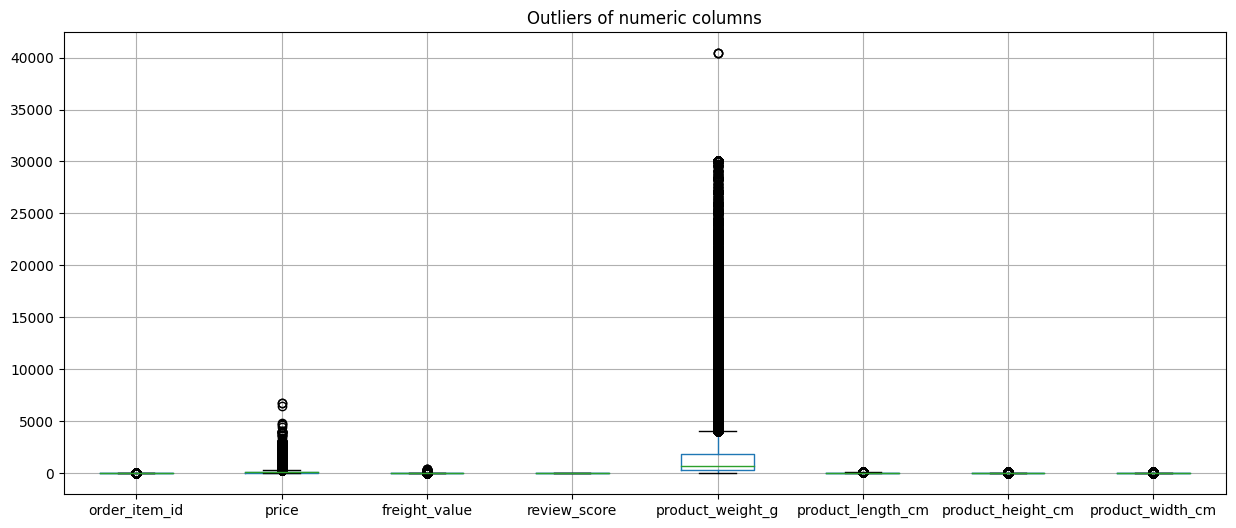


The number of records Before dropping outliers: 118271
The number of records After droping outliers: 0
Which means that the percentage of records that have outliers is: 100.0%


In [25]:
# create new df with only numeric cols
num_cols = list(df_merged.select_dtypes(include= "number").columns)
df_merged_num = df_merged[num_cols]

# display outliers using boxplots
plt.figure(figsize=(15,6))
plt.title("Outliers of numeric columns")
df_merged_num.boxplot()
plt.show()

# apply "calc_outliers"
lower_threshold, upper_threshold = calc_outliers(df_merged_num, None)

# print what will happen all records with outliers will be removed
before = len(df_merged_num)
outliers = df_merged_num[((df_merged_num > lower_threshold) | (df_merged_num < upper_threshold))].any(axis=1).sum()
after = before- outliers
print ("\nThe number of records Before dropping outliers:", before)
print ("The number of records After droping outliers:", after)
print ("Which means that the percentage of records that have outliers is: " + str((outliers/before)*100)+"%" )

As observed, almost every numeric column contains outliers and every record in the dataframe has at least one outlier.
When facing outliers there are 3 options:
1. **Keep** the outliers.
2. **Delete** the outliers.
3. **Replace** the outliers with alternative values.

Each of these options comes with its methods and trade-offs.  
Given the impracticality of completely removing outliers, which would result in the loss of the entire dataset, and the challenges of retaining all outliers, especially exceptionally unusual values, I have chosen a tailored approach:
* For the "order_item_id" column, I've decided to remove outliers due to their small fraction, extreme nature, and the potential for confusion if handled differently.
* As for the other columns, I've decided to use "Winsorizing" to recode outliers, effectively mitigating their impact on statistical measures without compromising the df size.

In [26]:
# step 1: remove outliers from "order_item_id"
lower_threshold, upper_threshold = calc_outliers(df_merged_num, "order_item_id")
df_merged = df_merged[(df_merged["order_item_id"] >= lower_threshold) &
                      (df_merged["order_item_id"] <= upper_threshold)].copy()

# step 2: use "winsorize"
num_cols.remove("review_score")
alpha = 0.1
df_merged.loc[:, num_cols] = df_merged[num_cols].apply(lambda col: winsorize(col, limits=[alpha, alpha]))

#### **After Preprocessing**

In [27]:
# print final result
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103611 entries, 0 to 118314
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103611 non-null  object        
 1   customer_id                    103611 non-null  object        
 2   order_status                   103611 non-null  object        
 3   order_purchase_timestamp       103611 non-null  datetime64[ns]
 4   order_approved_at              103611 non-null  datetime64[ns]
 5   order_delivered_carrier_date   103611 non-null  datetime64[ns]
 6   order_delivered_customer_date  103611 non-null  datetime64[ns]
 7   order_estimated_delivery_date  103611 non-null  datetime64[ns]
 8   order_item_id                  103611 non-null  int64         
 9   product_id                     103611 non-null  object        
 10  seller_id                      103611 non-null  object        
 11  price

**Obeservations-**   
* Irrelevant columns were removed from the original data frame, resulting in a reduced set of 24 columns instead of the original 40.
* Casting was preformed on columns representing "time," leading to the creation of 5 datetime columns.
* Addressing missing values and outliers involved completion and removal of values and records, resulting in a refined dataset with 103,611 records, down from the initial 118,315.

## **Data Analysis**

Data analysis is a crucial process in extracting meaningful insights from raw information. It involves analyzing datasets using statistical and computational techniques to provide valuable information for decision-making.  
This analysis will concentrate on the following key dimensions: Customers, Orders, Products, Sellers.

Using the following questions:
1. What is the customer growth rate from 2016 to 2018?
2. What is the number of new customers vs returned customers, from 2016 to 2018?
3. How is the distribution of customers by country changes per quarter?
4. What is the orders growth in 2016-2018?
5. What is the orders revenue during 2016-2018?
6. Is there a difference between the delivery times and estimated delivery times?
7. How do the order rankings change from 2016 to 2018?
8. What is the status of the orders?
9. What are the bestsellers categories in every year?
10. What are the bestsellers products in every year (by volume)?
11. Which categories generate the most profits for the company?
12. Which products generate the most profits for the company?
13. Who are the leading sellers by units sold?
14. Who are the leading sellers by sales?

In [28]:
# create lists
list_change_values = ["order_id", "customer_id", "product_id", "seller_id"]
list_perfix = ["order", "customer", "product", "seller"]
list_new_cols = ["order_id_new", "customer_id_new", "product_id_new", "seller_id_new"]
list_month = ["January", "February", "March", "April", "May", "June", "July",
              "August", "September", "October", "November", "December"]
list_year = [2016, 2017, 2018]

# add new cols: month, quarter, year, order_id_new, customer_id_new, product_id_new, seller_id_new
df_merged["month"] = df_merged["order_purchase_timestamp"].dt.strftime("%B")
df_merged["quarter"] = df_merged["order_purchase_timestamp"].dt.to_period("Q")
df_merged["year"] = df_merged["order_purchase_timestamp"].dt.year

for col1, prefix, col2 in zip(list_change_values, list_perfix, list_new_cols):
  mapping = {value: f'{prefix}{i}' for i, value in enumerate(df_merged[col1].unique(), start=1)}
  df_merged[col2] = df_merged[col1].map(mapping)

# divide "df_merged" into 3 different data frames based on year
df_merged_2016 = df_merged[df_merged["year"] == 2016]
df_merged_2017 = df_merged[df_merged["year"] == 2017]
df_merged_2018 = df_merged[df_merged["year"] == 2018]

#### **Customer dimension**

**1. What is the customer growth rate during 2016-2018?**  
Customer growth rate = The rate at which a business is acquiring new customers over a specific period.

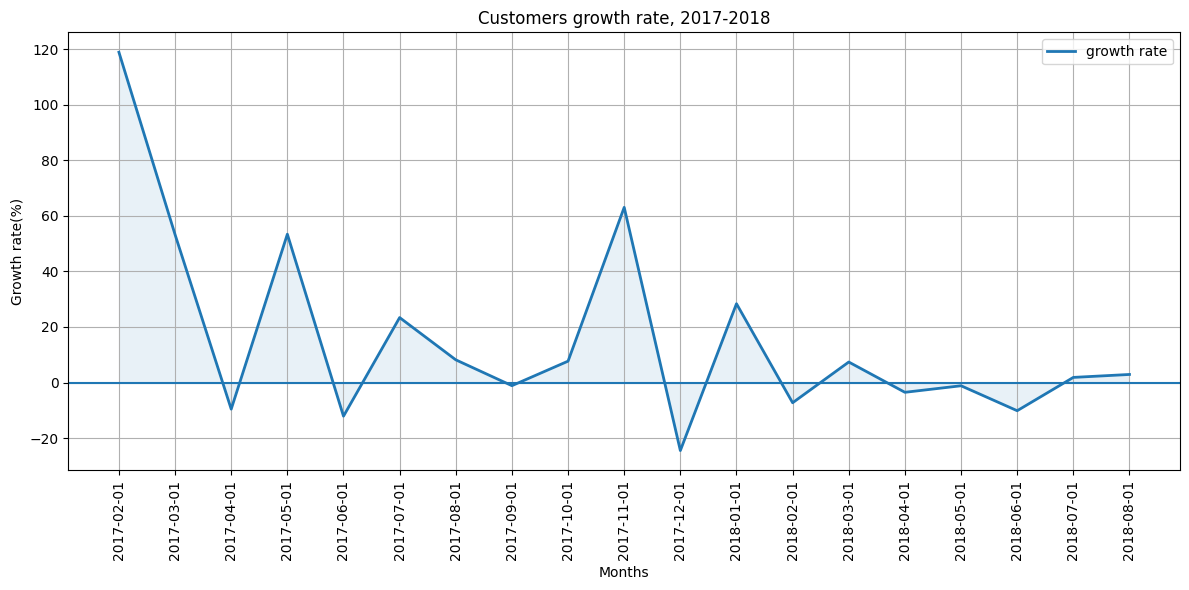

The annual growth is: -0.99%
Last growth is: 2.9%


In [29]:
# apply "customer_growth_rate"
df_customer_growth = customer_growth_rate(df_merged, list_year, list_month, "customer_id")

# apply "create_col_date" and filtter by date
df_customer_growth = create_col_date(df_customer_growth)

# calc the anuual growth
start = df_customer_growth.loc[0, "growth_rate"]
end = df_customer_growth.loc[len(df_customer_growth)-2, "growth_rate"]
annual_growth_rate = ((end / start) ** (1 / 2)) - 1

# fillter df_customer_growth and sort based on date
df_customer_growth_f= df_customer_growth[(df_customer_growth["date"] >= "2017-02") & (df_customer_growth["date"] < "2018-09")]

# apply function "line_graph"
line_graph(df_customer_growth_f,
           "date",
           "growth_rate",
           "growth rate",
           "Customers growth rate, 2017-2018",
           "Months",
           "Growth rate(%)")

# print statistics
print ("The annual growth is: "+ str(round(annual_growth_rate, 2))+"%")
print ("Last growth is: " + str(round(end, 2))+"%")

*Note- the graph illustrates the customer growth rate from February 2017 to August 2018.  
The fluctuations before this period are attributed to the company's initial activities, transitioning from zero to a significant number of customers. Post this period, data includes only a few days in September, which is incomplete.*

Customer growth rate shows that:
1. Annual growth is negetive. Usually it means that more customers are leaving or discontinuing their relationship with the company than are joining. This could be due to a variety of factors such as product or service dissatisfaction, competitive factors, or changes in customer needs.
2. Last month (08-2018) growth is positive and bigger than the annual growth, indicates a better performance than in previous months.   
This could be a good sign, indicating a possible recovery or a shift in trend.
3. The observation of high growth rates in specific months and the continued upward trend over those months may indicate seasonal patterns.

**2. What is the number of new customers vs returned customers, from 2016 to 2018?**  
New customers = customers with no previous relationship with the company.

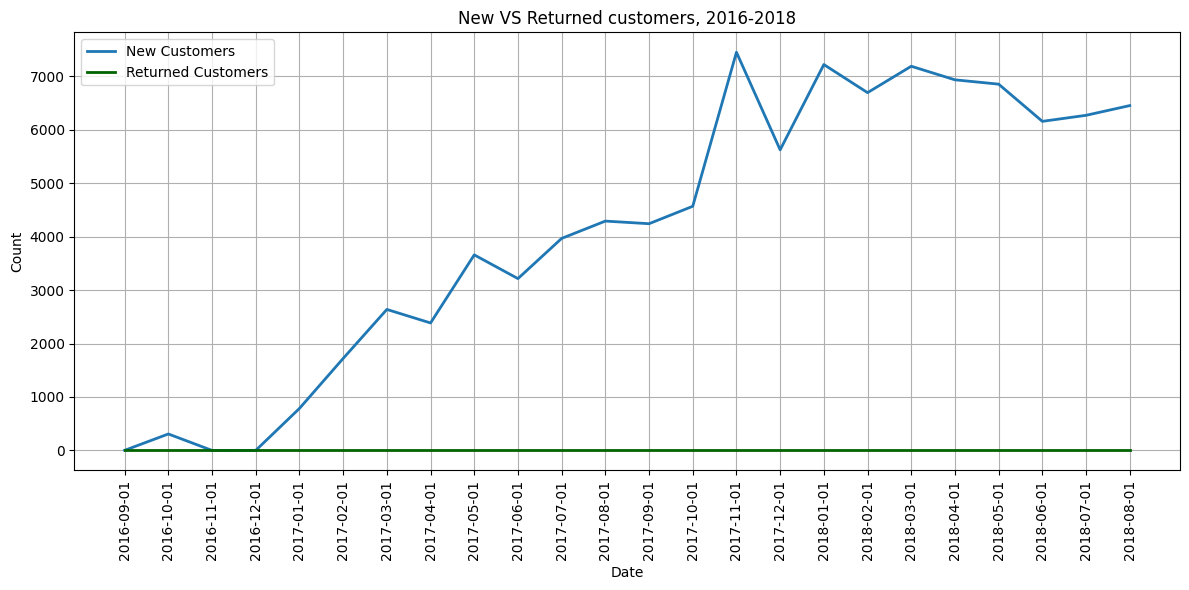

In [30]:
# filter df
df_customer_growth_f= df_customer_growth[df_customer_growth["date"] < "2018-09"]

# apply "growth_plt" on "df_customer_growth"
multiple_line_chart(df_customer_growth_f,
                    "new",
                    "returned",
                    "date",
                    "New VS Returned customers, 2016-2018",
                    "Date",
                    "Count",
                    ["New Customers","Returned Customers"])

When the growth of "new customers" is compared to the growth of "returning customers", the number of new customers shows in most of the times a consistent upward trend, while the returning customer count remains static at zero. This means:

1. Every month, the churn rate (lost customers / number of customers at the beginnig of the period) is 100%.
2. Despite monthly increases in customer numbers, the customer base is constantly changing.

These findings back up the assertion made in the "customer growth rate" analysis about an annual increase.


**3. How is the distribution of customers by country changes per quarter?**

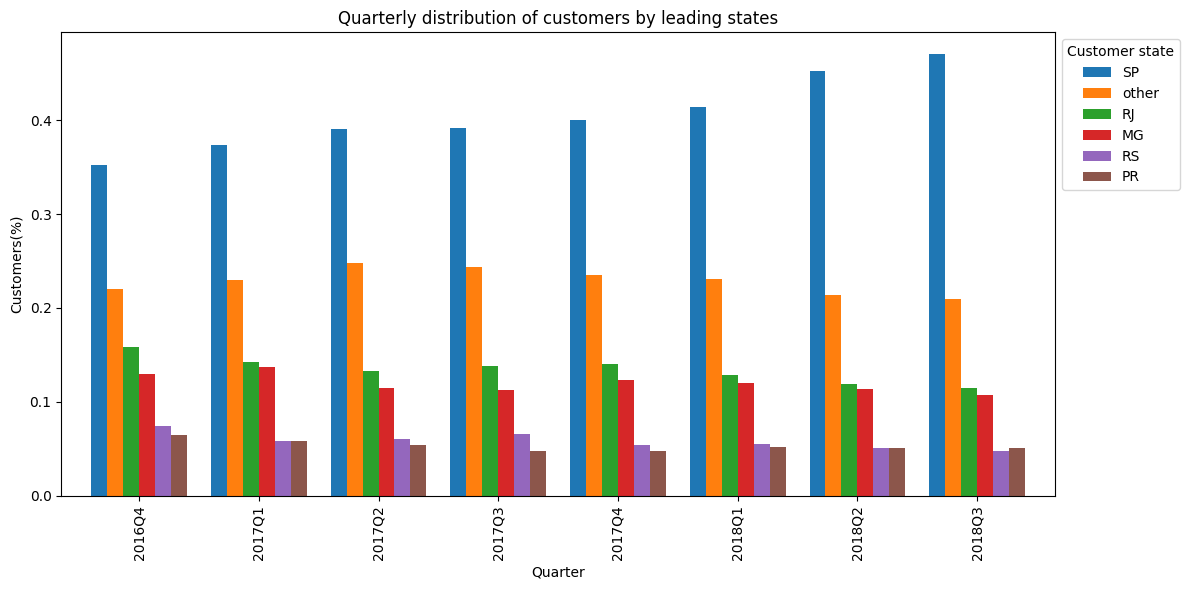

In [31]:
# apply "customer_distribution"
my_crosstab = customer_distribution(df_merged, "customer_id", "customer_state", "quarter","2016Q3")


# apply "grouped_bar_crosstab"
grouped_bar_crosstab(my_crosstab,
                     "Quarterly distribution of customers by leading states",
                      "Quarter",
                      "Customers(%)",
                      "Customer state")

The distribution reveals a consistent pattern, indicating that a majority of the company's customers reside in the following states: SP, RJ, MG, RS, PR, with a notable prevalence in favor of SP.

#### **Orders dimension**

**1. What is the orders growth during 2016-2018?**  

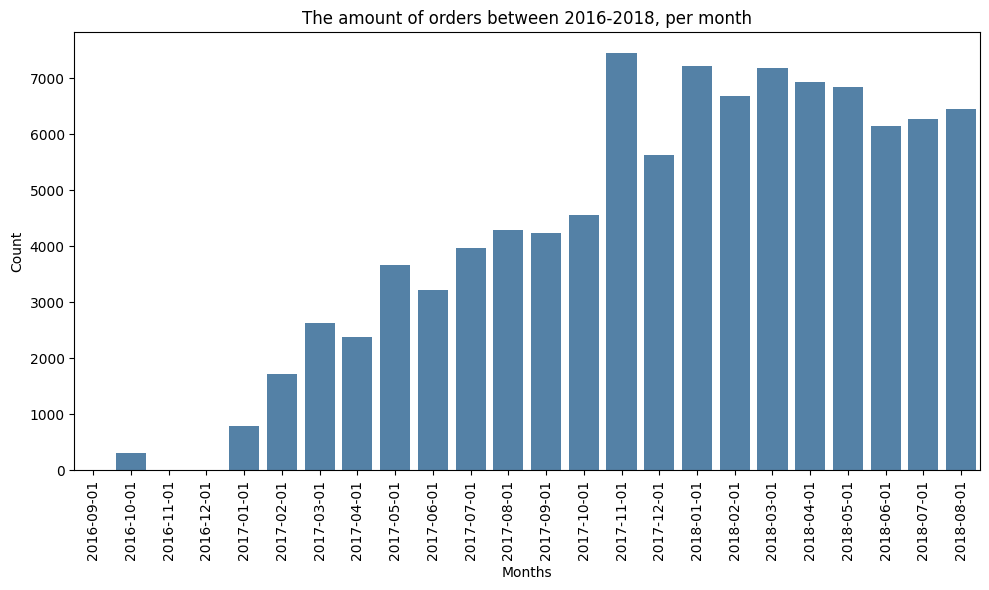

The average number of orders per month is: 4109.375
The current count of placed orders: 98625


In [32]:
# apply "order_growth_rate"
df_order_growth = order_growth(df_merged, list_year, list_month, "order_id")

# apply "create_col_date" and filtter by date
df_order_growth = create_col_date(df_order_growth)
df_order_growth= df_order_growth[df_order_growth["date"] < "2018-09"]

# apply "create_barplot_complicated"
create_barplot_complicated(df_order_growth,
                           "date",
                           "total",
                           "The amount of orders between 2016-2018, per month",
                           "Months",
                           "Count",
                           False)

# print statistics
print ("The average number of orders per month is:" , df_order_growth["total"].mean())
print ("The current count of placed orders:", df_order_growth["total"].sum())

*Note- the number of orders (per month) and the orders rate are equivalent to the total number of customers and the customer rate in a given month, as each customer in the DataFrame has made only one purchase.*

Upon examination of the order volume over period of time, we can see:
1. A generally positive trend is observed, indicating consistent growth. Despite a constantly changing customer base, this pattern suggests overall business stability.
2. Despite the overall positive trend observed over the period, order volume decreased in the last two quarters.
3. Fluctuations in order volume could be influenced by changes in customer base, indicating a direct relationship between order volume and the number of customer.
4. The presence of months with significant increases or decreases in order volume suggests a possible seasonal trend or the impact of specific promotions during those times.

**2. What are the company's revenues from orders between 2016-2018?**

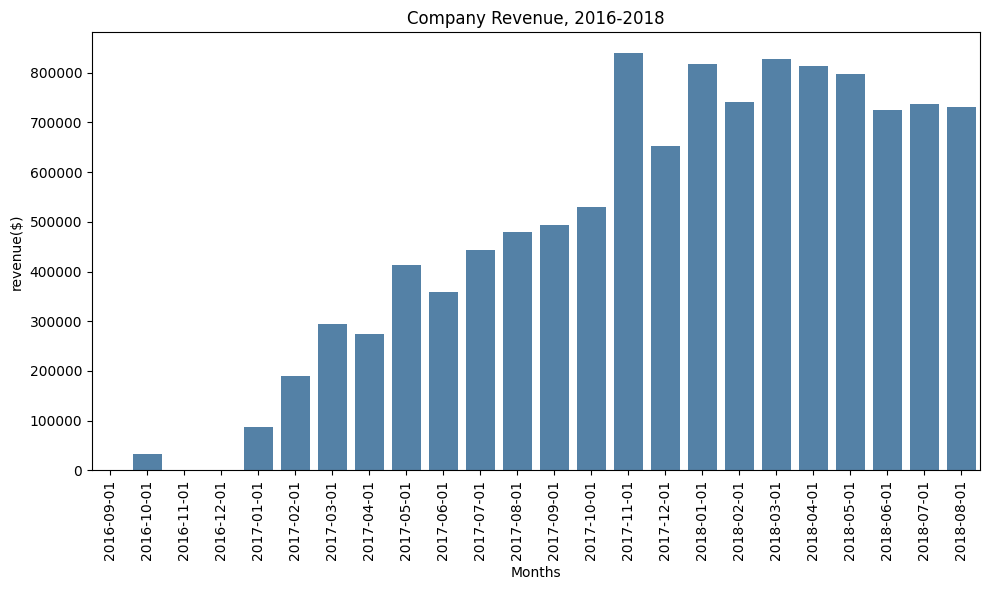

The average revenue (per month) is: 469969.25$
The overall revenue is: 11279261.99$


In [33]:
# create sub_df
sub_df = df_merged.drop_duplicates(subset="order_id")
sub_df_d = sub_df[(sub_df["order_status"] == "delivered")]

# apply "revenue_growth"
df_revenue_growth = revenue_growth(sub_df_d, "price", "freight_value", ["year", "month"])

# add records mannualy for month with zero orders "delivered"
new_r1 = {'year': 2016, 'month': 'September', 'total_price': 0}
new_r2 = {'year': 2016, 'month': 'November', 'total_price': 0}
df_revenue_growth.loc[len(df_revenue_growth)] = new_r1
df_revenue_growth.loc[len(df_revenue_growth)] = new_r2

# apply "create_col_date"
df_revenue_growth = create_col_date(df_revenue_growth)

# filter df
df_revenue_growth= df_revenue_growth[df_revenue_growth["date"] < "2018-09"]

# apply "create_barplot_complicated"
create_barplot_complicated(df_revenue_growth,
                           "date",
                           "total_price",
                           "Company Revenue, 2016-2018",
                           "Months",
                           "revenue($)",
                           False)

# print statistics
print ("The average revenue (per month) is:", str(round(df_revenue_growth["total_price"].mean(), 2))+ "$")
print ("The overall revenue is:", str(round(df_revenue_growth["total_price"].sum(), 2))+ "$")

*Note- The orders relevant to this question are orders whose order status is "delivered". In September and November 2016, there are no orders with this status, so they were added manually.*

Profitability analysis reflects trends in both order volume and customer growth rate. This supports the assumption that a correlation exists between the number of monthly customers, the number of monthly orders and monthly revenue from orders.

**3. Is there a difference between the delivery times and estimated delivery times?**

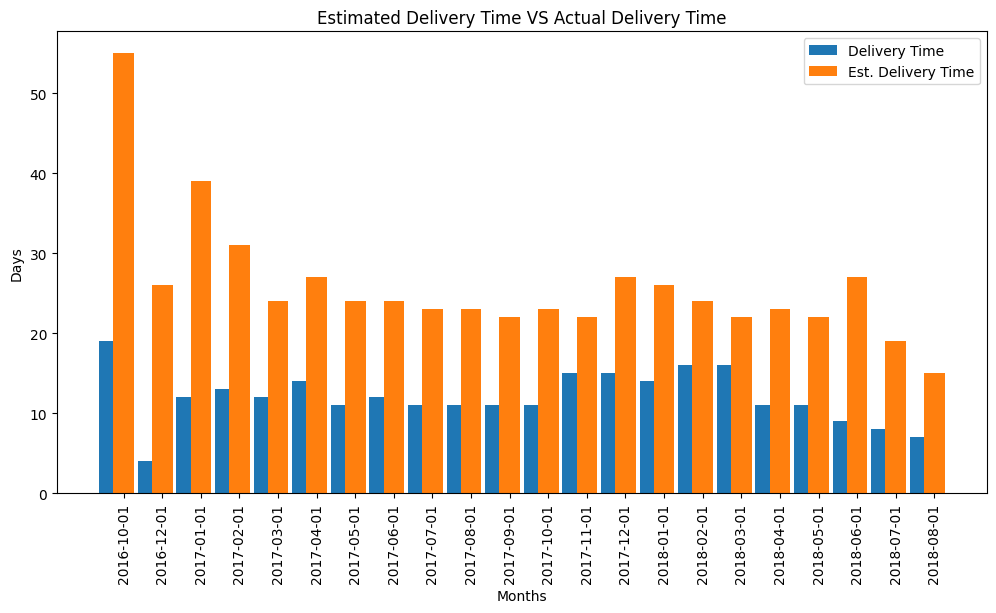

The average time for delivery is: 11.95 days.
The average time for estimated delivery is: 25.82 days.


In [34]:
# apply "delivery_times"
df_delivery_time = delivery_times(sub_df_d, ["year", "month"])

# apply "create_col_date"
df_delivery_time = create_col_date(df_delivery_time)

# apply "group_bar_df"
grouped_bar_df(df_delivery_time,
              "delivery_time",
              "est_delivery_time",
              "date",
              "Estimated Delivery Time VS Actual Delivery Time",
              "Months",
              "Days",
              ["Delivery Time", "Est. Delivery Time"])

# print statistics
print ("The average time for delivery is:", str(round(df_delivery_time["delivery_time"].mean(), 2)) + " days.")
print ("The average time for estimated delivery is:", str(round(df_delivery_time["est_delivery_time"].mean(), 2)) + " days.")

*Note- The orders relevant to this question are orders whose order status is "delivered". In September and November 2016, there were no orders with this status, therefore they were not included in this graph.*

* In both cases, there is an observable positive trend over time, which is especially pronounced in the last two quarters.
* Delivers were made on average throughout the specified period ahead of the company's committed timeframe.

**4. How do the order rankings change during 2016-2018?**

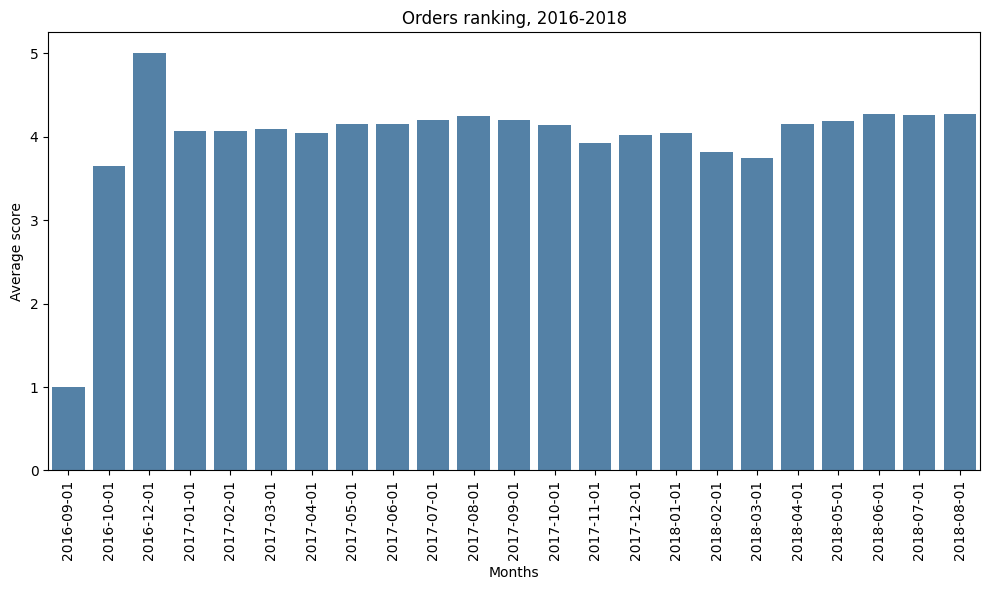

The average ranking is: 3.99


In [35]:
# apply "ranking"
df_ranking = ranking(sub_df, "review_score", ["year", "month"])

# apply "create_col_date"
df_ranking = create_col_date(df_ranking)

# filter df
df_ranking= df_ranking[df_ranking["date"] < "2018-09"]

# apply "create_barplot_complicated"
create_barplot_complicated(df_ranking,
                           "date",
                           "avg_score",
                           "Orders ranking, 2016-2018",
                           "Months",
                           "Average score",
                           False)

# print statistics
print ("The average ranking is: " + str(round(df_ranking["avg_score"].mean(), 2)))

*Note- November 2016 does not appear in the graph since there were no orders in this month.*

A look at the monthly average rating reveals the following:
1. There has been a consistent upward trend in ratings, with an average monthly rating of 3.99.
2. Although there has been a decline in customer numbers, orders, and profits, the ratings have increased significantly in the last two quarters. This indicates that the business might have effectively targeted its customers, provided exceptional service, or delivered high-quality products.
3. There were notable outliers in September and December 2016. Due to the limited number of customers in these months (1-2), these bars should be disregarded.

**5. What is the status of the orders?**

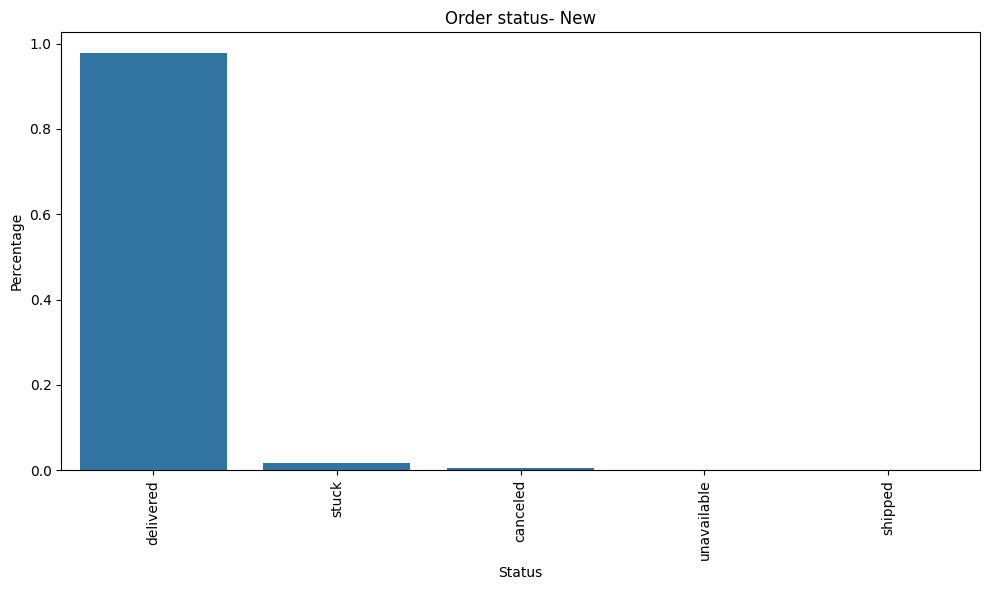

The precetage of order that are delivered is: 97.782%
The precetage of order that are stuck is: 1.741%
The precetage of order that are canceled is: 0.467%
The precetage of order that are shipped is: 0.004%
The precetage of order that are unavailable is: 0.006%


In [36]:
# create df
sub_df_N = sub_df["order_status"].value_counts(normalize=True)
sub_df_N = pd.DataFrame(sub_df_N).reset_index()

# apply "create_barplot_complicated"
create_barplot_complicated(sub_df_N, "order_status", "proportion", "Order status- New", "Status", "Percentage", True)

# print the precenteg per status
list_status = list(df_merged["order_status"].unique())
for status in list_status:
  length = len(sub_df[sub_df["order_status"]== status])
  print ("The precetage of order that are " + status + " is:",  str(round((length / len(sub_df)*100), 3)) + "%")

The order status analysis indicates that the majority of orders were successfully delivered. However, approximately 2.2% of orders faced non-delivery due to cancellations or encountered issues that hindered the delivery process ("canceled", "stuck").


#### **Product dimension**

**1. What are the bestsellers categories in every year?**  
Bestsellers= sold the most units

,quarter,1th,2th,3th,4th,5th
0,2016Q4,furniture_decor,health_beauty,perfumery,toys,sports_leisure
1,2017Q1,furniture_decor,bed_bath_table,health_beauty,sports_leisure,telephony
2,2017Q2,bed_bath_table,sports_leisure,housewares,health_beauty,computers_accessories
3,2017Q3,bed_bath_table,sports_leisure,health_beauty,furniture_decor,computers_accessories
4,2017Q4,bed_bath_table,sports_leisure,health_beauty,toys,furniture_decor
5,2018Q1,computers_accessories,bed_bath_table,sports_leisure,health_beauty,furniture_decor
6,2018Q2,health_beauty,bed_bath_table,watches_gifts,housewares,sports_leisure
7,2018Q3,health_beauty,bed_bath_table,housewares,watches_gifts,sports_leisure


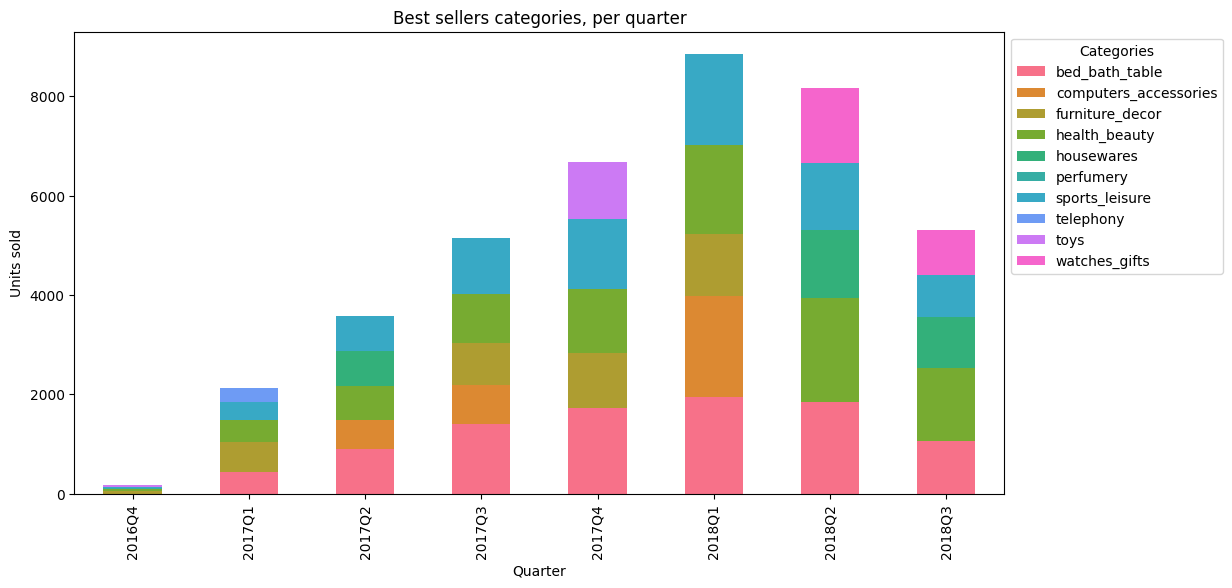

In [37]:
# filter df
new_sub_df = sub_df[sub_df["quarter"] != "2016Q3"]

# apply "display_topsellers"
best_performers(new_sub_df,
                   "count",
                   "quarter",
                   "product_category_name_english",
                   "order_id",
                   5,
                   "Best sellers categories, per quarter",
                   "Quarter",
                   "Units sold",
                   "Categories")

The analysis of categories sales distribution over time reveals the following:
* Certain categories consistently outperform others in terms of sales, including: "sports_leisure", "bed_bath_table" and "health_beauty".
* Categories that have witnessed a decline in popularity and are no longer considered among the best-selling include: "perfumery", "toys".
* Under "New arrivals" in 2018, category "watches_gifts" made a notable appearance on the best-selling lit.


**2. What are the bestsellers products in every year (by volume)?**

,quarter,1th,2th,3th,4th,5th
0,2016Q4,product10502,product10506,product24952,product10078,product10518
1,2017Q1,product8775,product16096,product5392,product10900,product10500
2,2017Q2,product5392,product7233,product4521,product1697,product1701
3,2017Q3,product9197,product5392,product1697,product4168,product1701
4,2017Q4,product4168,product4166,product4167,product4169,product1706
5,2018Q1,product2642,product20468,product11428,product2889,product2647
6,2018Q2,product60,product2642,product20468,product2889,product11986
7,2018Q3,product4944,product11986,product9643,product16204,product11985


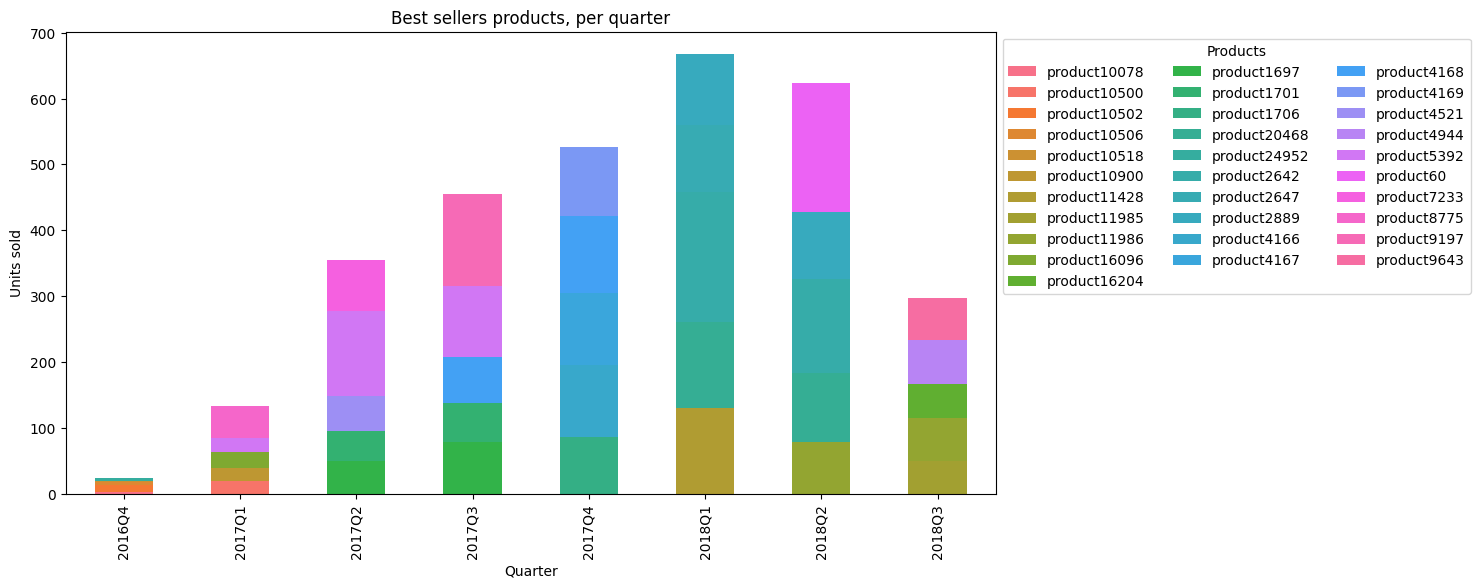

In [38]:
# apply "display_topsellers"
best_performers(new_sub_df,
                   "count",
                   "quarter",
                   "product_id_new",
                   "order_id",
                   5,
                   "Best sellers products, per quarter",
                   "Quarter",
                   "Units sold",
                   "Products")

The analysis of product sales distribution over time reveals the following:
1. The top-selling products change year after year, indicating a dynamic trend.
2. Certain products remained best sellers in certain quarters, demonstrating consistent popularity in these periods.
For example, products "product2642", "product20468" and "product11986".

**3. Which categories generate the most profits for the company?**

,quarter,1th,2th,3th,4th,5th
0,2016Q4,perfumery,furniture_decor,health_beauty,toys,sports_leisure
1,2017Q1,furniture_decor,health_beauty,bed_bath_table,sports_leisure,cool_stuff
2,2017Q2,bed_bath_table,cool_stuff,sports_leisure,health_beauty,computers_accessories
3,2017Q3,bed_bath_table,sports_leisure,health_beauty,cool_stuff,watches_gifts
4,2017Q4,bed_bath_table,watches_gifts,sports_leisure,health_beauty,toys
5,2018Q1,computers_accessories,sports_leisure,health_beauty,bed_bath_table,watches_gifts
6,2018Q2,health_beauty,watches_gifts,bed_bath_table,sports_leisure,housewares
7,2018Q3,health_beauty,watches_gifts,housewares,bed_bath_table,sports_leisure


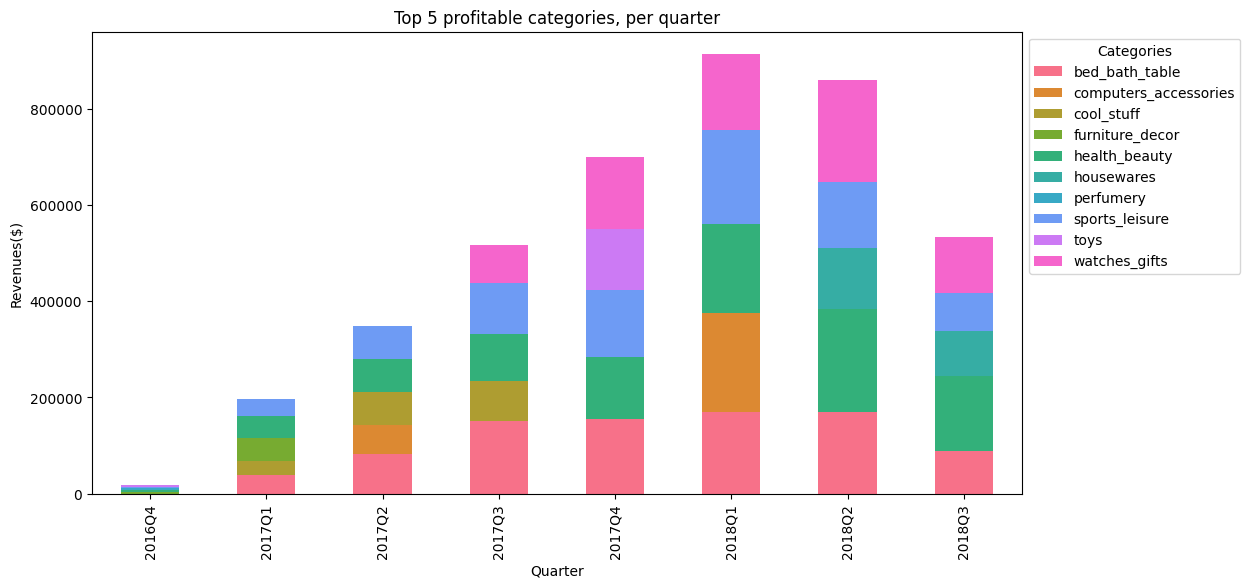

In [39]:
# apply "display_topsellers"
best_performers(new_sub_df,
                   None,
                   "quarter",
                   "product_category_name_english",
                   "price",
                   5,
                   "Top 5 profitable categories, per quarter",
                   "Quarter",
                   "Revenues($)",
                   "Categories")

The analysis of categories revenues distribution over time reveals the following:
* Certain categories consistently outperform others, including: "bed_bath_table", "health_beauty" and "sports_leisure".
* Categories that have witnessed a decline in revenue and are no longer considered among the most profitable products include: "perfumery", "toys", and "furniture_decor".
* Under "New arrivals" in 2018, category "housewares" made a notable appearane.


**4. Which products generate the most profits for the company?**

,quarter,1th,2th,3th,4th,5th
0,2016Q4,product10502,product24952,product10530,product15850,product10078
1,2017Q1,product18808,product10502,product2041,product28479,product9585
2,2017Q2,product5392,product2041,product4514,product4521,product4513
3,2017Q3,product9197,product5392,product61,product22494,product9649
4,2017Q4,product13567,product59,product2889,product1706,product75
5,2018Q1,product20468,product11428,product2889,product3481,product2642
6,2018Q2,product60,product20468,product3481,product2889,product2642
7,2018Q3,product9643,product11986,product3481,product75,product4944


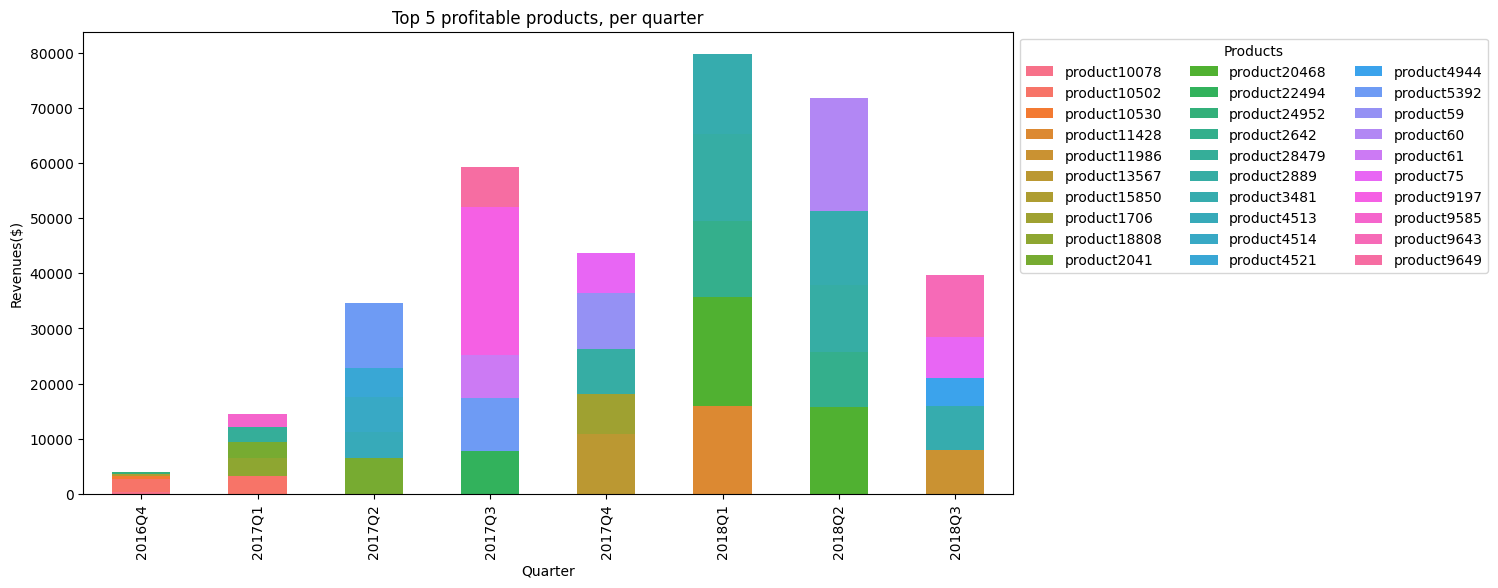

In [40]:
# apply "display_topsellers"
best_performers(new_sub_df,
                   None,
                   "quarter",
                   "product_id_new",
                   "price",
                   5,
                   "Top 5 profitable products, per quarter",
                   "Quarter",
                   "Revenues($)",
                   "Products")

* The profitable products each year change, however, between 2017-2018 several products continued to be the most profitable for period of time and they are: "product2889" in 2017Q4-2018Q2 and "product3481" in 2018Q2-2018Q3.
* These products belong to the following categories: "health_beauty", "computers_accessories".

#### **5.4. Seller dimension**

**1. Who are the leading sellers by units sold?**


,quarter,1th,2th,3th,4th,5th,6th,7th,8th,9th,10th
0,2016Q4,seller252,seller1443,seller238,seller280,seller426,seller1123,seller522,seller1266,seller112,seller12
1,2017Q1,seller280,seller252,seller111,seller354,seller15,seller96,seller58,seller22,seller806,seller52
2,2017Q2,seller96,seller111,seller33,seller104,seller63,seller354,seller92,seller280,seller191,seller44
3,2017Q3,seller33,seller111,seller104,seller86,seller96,seller212,seller280,seller171,seller15,seller6
4,2017Q4,seller33,seller86,seller104,seller111,seller171,seller30,seller22,seller238,seller6,seller56
5,2018Q1,seller35,seller49,seller30,seller22,seller111,seller86,seller33,seller171,seller15,seller6
6,2018Q2,seller49,seller42,seller104,seller74,seller6,seller22,seller35,seller30,seller111,seller86
7,2018Q3,seller104,seller74,seller289,seller6,seller254,seller49,seller111,seller22,seller45,seller60


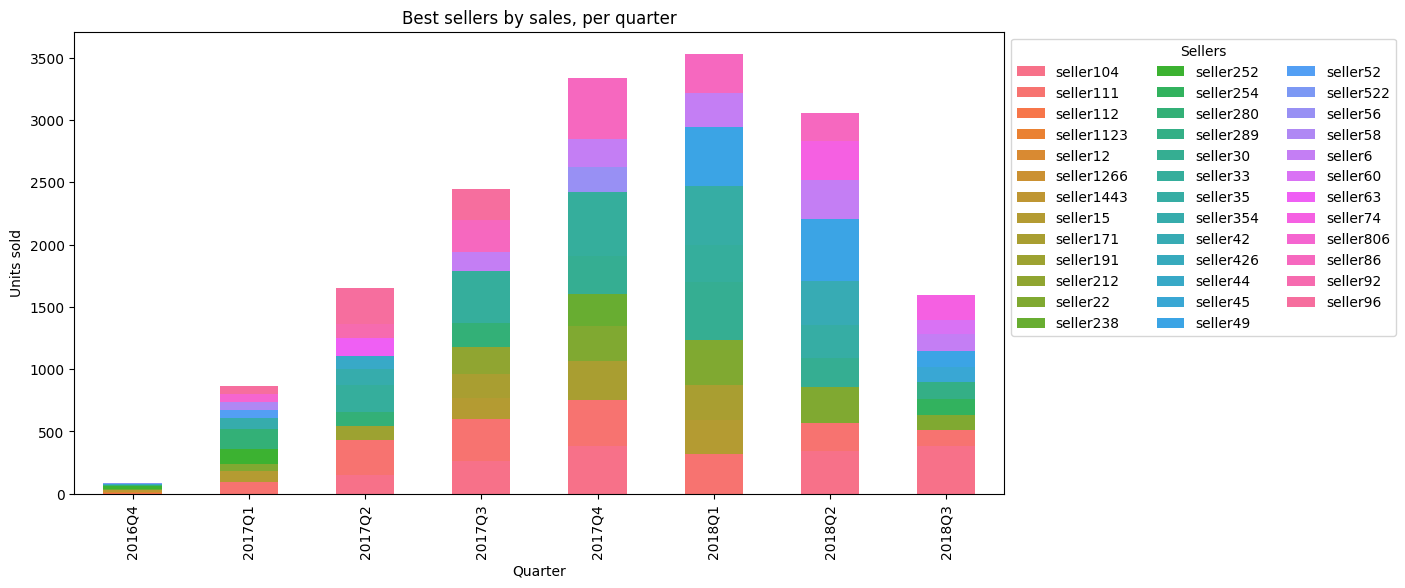

In [41]:
# apply "best_performers"
best_performers(new_sub_df,
                "count",
                "quarter",
                "seller_id_new",
                "order_id",
                10,
                "Best sellers by sales, per quarter",
                "Quarter",
                "Units sold",
                "Sellers")

The analysis shows the following:
1. The top sellers vary from quarter to quarter, suggesting a competitive environment for the sellers.
2. Certain sellers, such as "seller111", appear in multiple quarters, demonstrating their consistent performance and effectiveness at maintaining a presence over time.
3. Certain sellers appear only in specific quarters, implying that their success is tied to seasonal patterns.

**2. Who are the leading sellers by total revenue?**


,quarter,1th,2th,3th,4th,5th,6th,7th,8th,9th,10th
0,2016Q4,seller252,seller238,seller1443,seller522,seller16,seller1123,seller112,seller426,seller280,seller2462
1,2017Q1,seller252,seller280,seller15,seller120,seller111,seller11,seller96,seller22,seller675,seller58
2,2017Q2,seller96,seller111,seller120,seller48,seller15,seller44,seller141,seller11,seller33,seller252
3,2017Q3,seller212,seller111,seller96,seller227,seller6,seller15,seller33,seller238,seller104,seller86
4,2017Q4,seller238,seller6,seller111,seller33,seller122,seller227,seller22,seller171,seller86,seller56
5,2018Q1,seller6,seller15,seller22,seller49,seller111,seller56,seller276,seller96,seller171,seller42
6,2018Q2,seller42,seller49,seller6,seller74,seller22,seller104,seller122,seller555,seller111,seller15
7,2018Q3,seller74,seller104,seller6,seller227,seller314,seller42,seller122,seller289,seller167,seller49


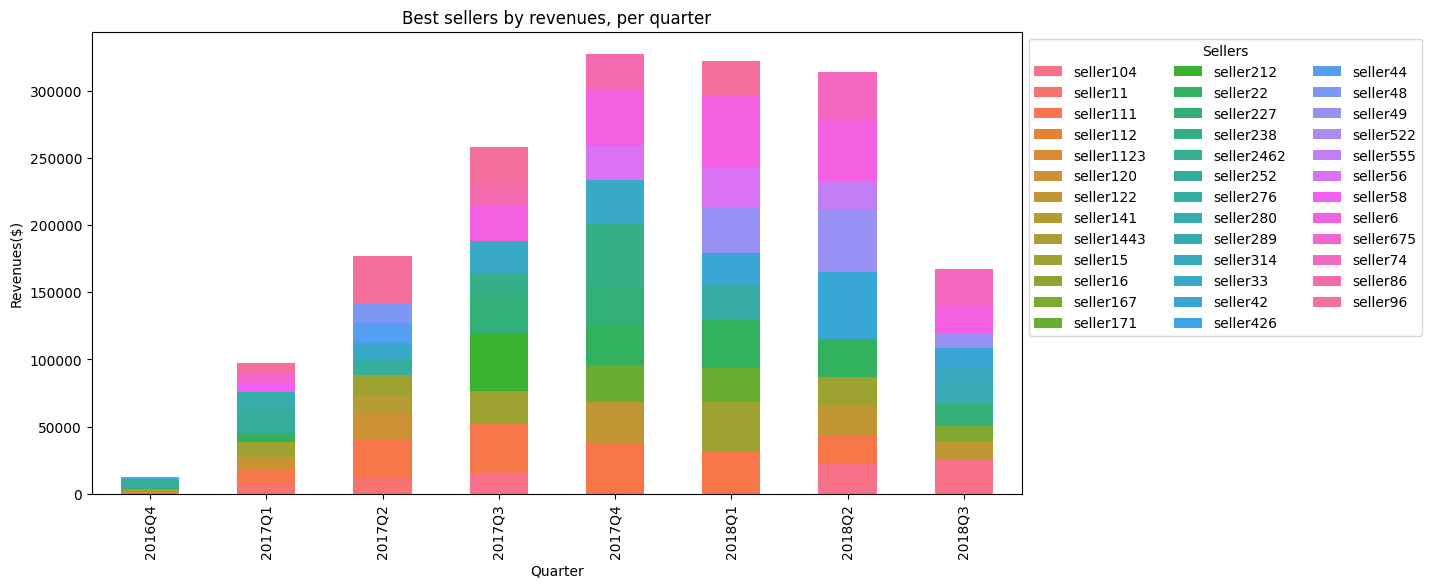

In [42]:
# apply "best_performers"
best_performers(new_sub_df,
                None,
                "quarter",
                "seller_id_new",
                "price",
                10,
                "Best sellers by revenues, per quarter",
                "Quarter",
                "Revenues($)",
                "Sellers")


Similar patterns are evident in the data analysis of seller performance(sales). Notably, "Seller 11" emerges as a significant figure, solidifying its position as a key player in the field.

## **Summary and conclusions**

The project included a comprehensive examination of Olist and its market position from 2016 to 2018, with a sample dataset of approximately 100,000 records distributed across various dataframes. The goal was to use statistical methodologies to gain a comprehensive understanding of the company's overall situation. The project comprised the following steps:
1. Problem Definition: The project formulated a comprehensive problem statement, dissecting it through key performance indicators.
2. Data Collection: The raw data was obtained from the Kaggle website, which was provided by the company. The data was combined into a single dataframe to provide a more comprehensive and meaningful representation of each order.
3. Exploratory Data Analysis (EDA): A preliminary overview was conducted to understand the available data and its distribution. This step provided an initial snapshot of the company's situation.
4. Data Preprocessing: This step involved data preparation, including cleaning for missing, irrelevant, and abnormal values. Every data manipulation performed was justified.
5. Data Analysis: In this stage, a detailed examination of the data was conducted to derive in-depth insights about the company based on key performance indicators.

**Key Points Highlighted:**
1. The dataset is generally unbalanced and represents a small fraction of the total number of actual orders, cautioning against considering it a perfect reflection of the company's situation.
2. Regarding key performance indicators:  
* Customers:
  * Despite a consistent increase in the number of customers, the negative growth rate of new customers suggests potential issues such as product quality, service, or competitive factors.
  * A notable challenge lies in the frequent turnover of customers, indicating a potential shift in the target audience or customer dissatisfaction.
  * The customer base is primarily concentrated in the countries SP, RJ, MG, RS, and PR.
* Orders:
  * Order quantity and profit exhibit an upward trend, with a recent decrease in the last two quarters.
  * Periods of increased orders correlate with successful campaigns or seasonal trends.
  * Delivery times have improved, with an average of 11.5 days.
  * Overall customer satisfaction, as indicated by ratings, is approximately 4/5.
  * The majority of orders have been successfully delivered, with less than 3% remaining undelivered.
* Products:
  * Certain products and categories consistently rank as top sellers and highly profitable items.
  * Central categories stand out across all countries where the company operates, with few countries favoring other categories over the top ones.

**Recommendations:**
1. Address the customer retention issue by consolidating and stabilizing the customer base, focusing initially on geographic strengths.
2.Investigate the high abandonment rate to identify underlying reasons. Additional data collection is recommended to shed light on customer abandonment causes.
3. Align marketing campaigns with periods of increased orders.
4. Examine and optimize the supply chain to prevent delays and potential issues marked as "stuck" orders.
5. Invest in and nurture top-selling products and categories, strengthening relationships with their respective sellers due to their significant .ribution to the company's



